<a href="https://colab.research.google.com/github/peakprogrammerrrrr/Easy-data-structures-machine-learning/blob/main/Iris_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine learning project*1

Data set was obtained here:

https://archive.ics.uci.edu/dataset/53/iris

In [ ]:
#Lets test out some dataset and see how far we can go with machine learning

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('iris.data', names = cols)

In [ ]:
df.shape

(150, 5)

In [ ]:
df['class'] = (df['class'] == 'Iris-setosa').astype(int)

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


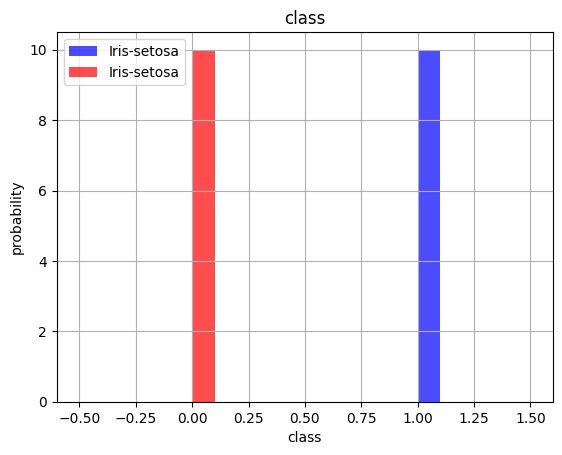

In [ ]:
for label in cols[-1:]:
  plt.hist(df[df['class'] == 1][label], color = 'blue' , label = 'Iris-setosa', alpha = 0.7, density = True)
  plt.hist(df[df['class'] == 0][label], color = 'red', label = 'Iris-setosa', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
#Train, Test and Validate

In [ ]:
train_df, valid_df, test_df = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample = False):

  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)
  data = np.hstack((X, np.reshape(y, (-1,1))))

  if oversample:
    ros  = RandomOverSampler()
    X,y = ros.fit_resample(X,y)


  return data, X, y



In [ ]:
#The StandardScaler() ----> essentially makes the data normalize better.
#But the issue is that it is not compatible with Gradient based algorithms

#The RandomOverSampler() ----> essenstially duplicates data due to imbalances.
#Notable aspect is that when the Majority class('sample') > Minority class('sample')


In [ ]:
#I dont really require the StandardScaler() or the RandomOverSampler() for this specific dataset.
#But for the sake of learning I will go through KNN,SVM and Naives Bayes again.

In [ ]:
train, X_train, y_train = scale_dataset(train_df, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid_df, oversample = False)
test, X_test, y_test = scale_dataset(test_df, oversample = False)

#KNN model for this dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_valid)
y1_pred = knn_model.predict(X_test)
y2_pred = knn_model.predict(X_train)

In [ ]:
print(classification_report(y_valid, y_pred))
print(classification_report(y_test, y1_pred))
print(classification_report(y_train, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



#Naives Bayes for this dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_valid)
y1_pred = nb_model.predict(X_test)
y2_pred = nb_model.predict(X_train)

In [ ]:
print(classification_report(y_valid, y_pred))
print(classification_report(y_test, y1_pred))
print(classification_report(y_train, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



#SVM model for this dataset

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_valid)
y1_pred = svm_model.predict(X_test)
y2_pred = svm_model.predict(X_train)

In [ ]:
print(classification_report(y_valid, y_pred))
print(classification_report(y_test, y1_pred))
print(classification_report(y_train, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



#Logistic Regression for this dataset

In [ ]:
#Here on out will the gradient-based algorithms
#Lets see if there is any deviation for the accuracy
#Do note that there are very little sample in this dataset therefore I dont realy expect any deviation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_valid)
y1_pred = lg_model.predict(X_test)
y2_pred = lg_model.predict(X_train)

In [ ]:
print(classification_report(y_valid, y_pred))
print(classification_report(y_test, y1_pred))
print(classification_report(y_train, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



#Linear Regression model with this dataset

In [ ]:
#One notable feature to keep in mind is to remember that when it comes to linear regression Reshaping the data set is a very crucial move
#Not changing the data set from continuos to binary can cause immense error in the programming module

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
import copy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('iris.data', names = cols)

In [ ]:
df.columns = cols
df['class'] = (df['class'] == 'Iris-setosa').astype(int)

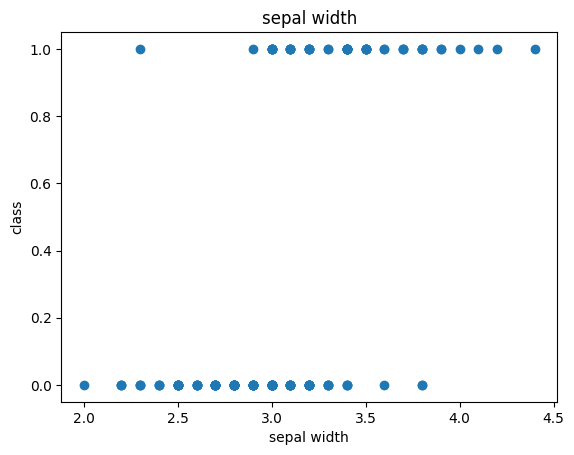

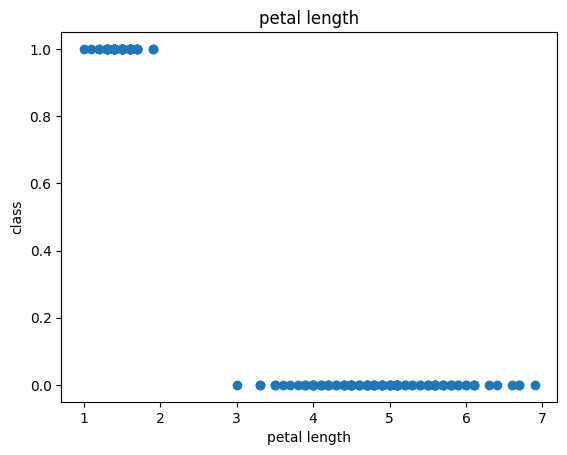

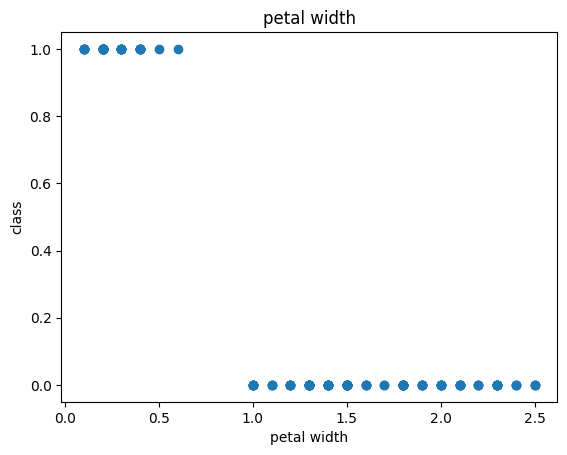

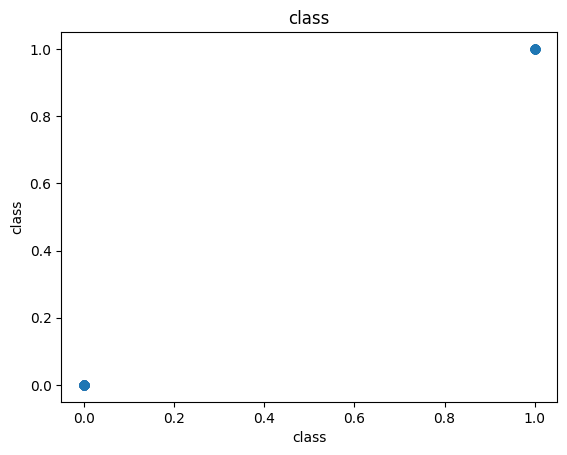

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['class'])
  plt.title(label)
  plt.ylabel('class')
  plt.xlabel(label)
  plt.show()

In [ ]:
train_df, valid_df, test_df = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels[0] is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].value
  else:
    if len(x_labels) == 1:
       X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y =  dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

In [ ]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [ ]:
data_train_all, X_train_all, y_train_all = get_xy(train_df, 'class', x_labels = df.columns[1:])
data_valid_all, X_valid_all, y_valid_all = get_xy(valid_df, 'class', x_labels = df.columns[1:])
data_test_all, X_test_all, y_test_all = get_xy(test_df, 'class', x_labels = df.columns[1:])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

1.0

In [ ]:
#The reason behind me using multiple linear regression as to just a single one is due to the fact that I am lazy.
#Nevertheless the concept behind it is still the same

#Neural Network model with this dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history ['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
  history = nn_model.fit(
      X_train, y_train, epochs = epochs , batch_size = batch_size, validation_split = 0.2, verbose = 0
  )
  return nn_model, history

16 nodes, dropout 0, lr0.01 , batch size 32 


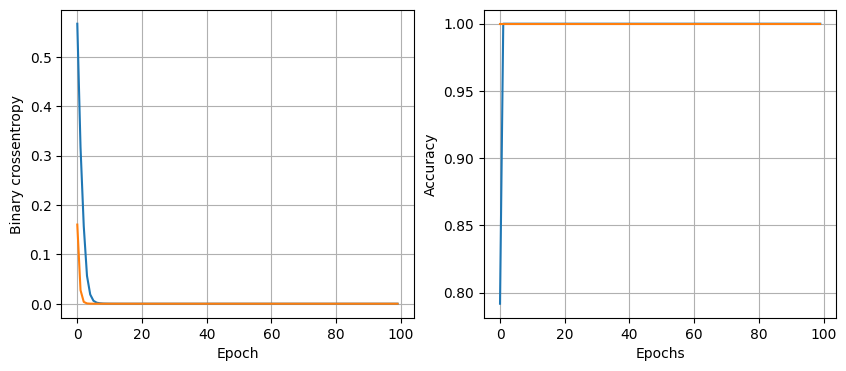

1/1 [==============================] - 0s 31ms/step - loss: 6.9639e-05 - accuracy: 1.0000
16 nodes, dropout 0, lr0.01 , batch size 64 


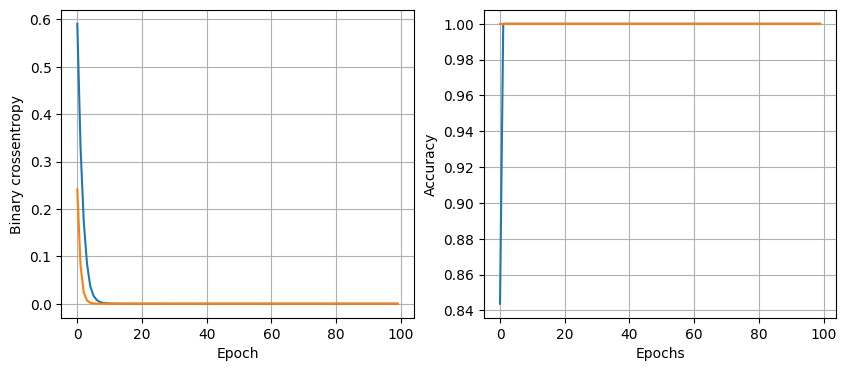

1/1 [==============================] - 0s 28ms/step - loss: 1.4324e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr0.01 , batch size 128 


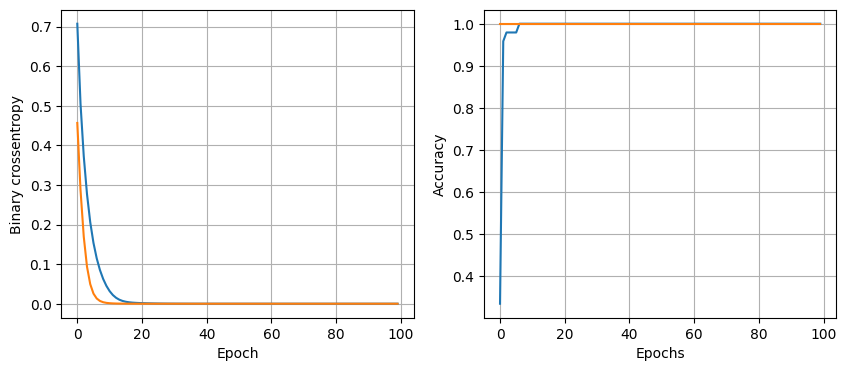

1/1 [==============================] - 0s 26ms/step - loss: 1.0898e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr0.005 , batch size 32 


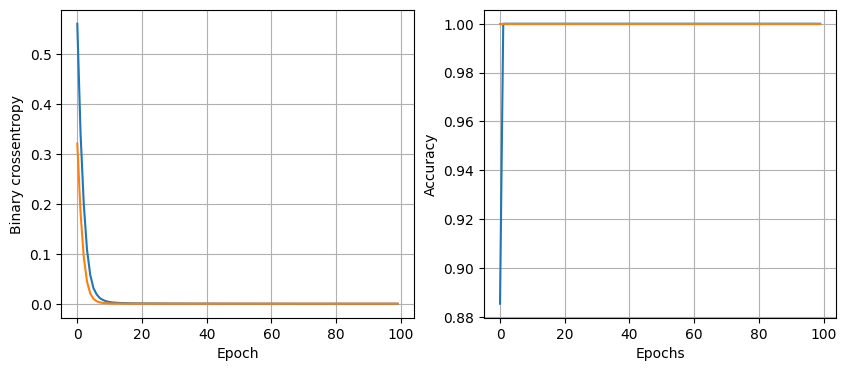

1/1 [==============================] - 0s 28ms/step - loss: 3.2727e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr0.005 , batch size 64 


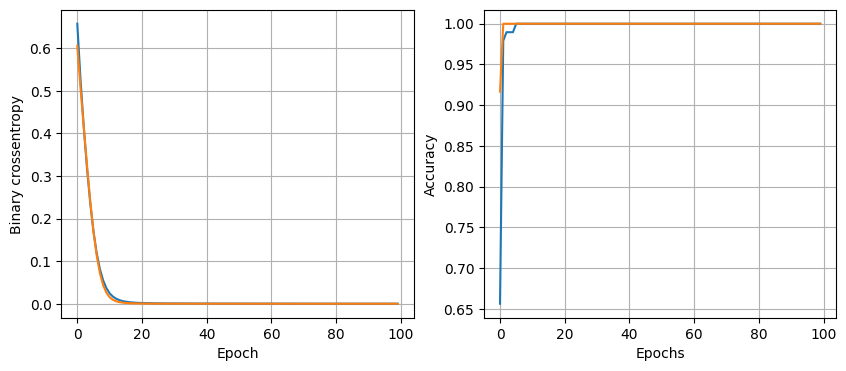

1/1 [==============================] - 0s 29ms/step - loss: 5.1448e-04 - accuracy: 1.0000
16 nodes, dropout 0, lr0.005 , batch size 128 


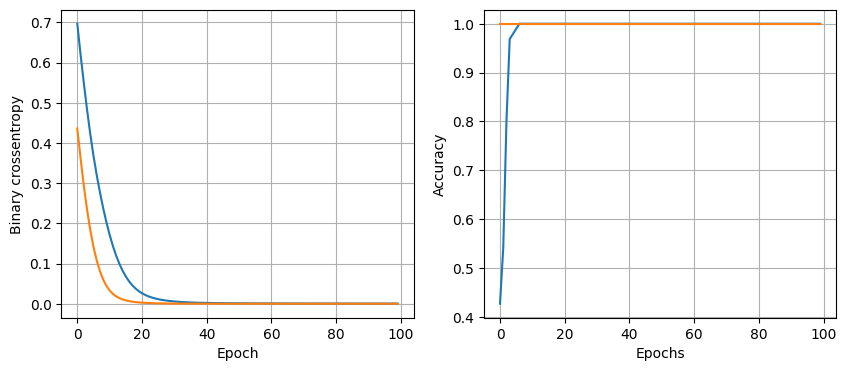

1/1 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 1.0000
16 nodes, dropout 0, lr0.001 , batch size 32 


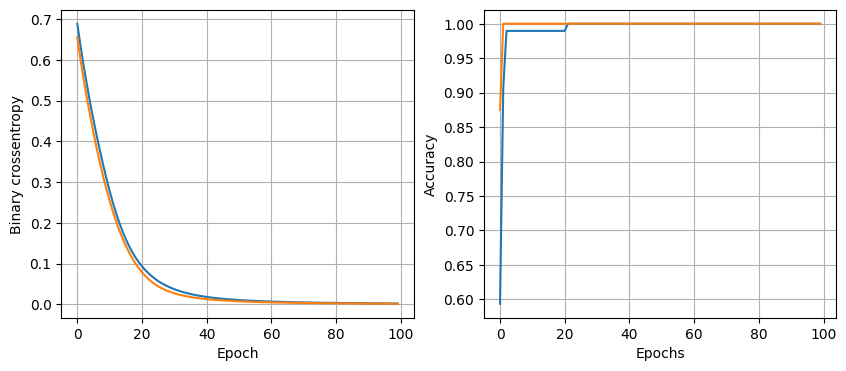

1/1 [==============================] - 0s 30ms/step - loss: 0.0031 - accuracy: 1.0000
16 nodes, dropout 0, lr0.001 , batch size 64 


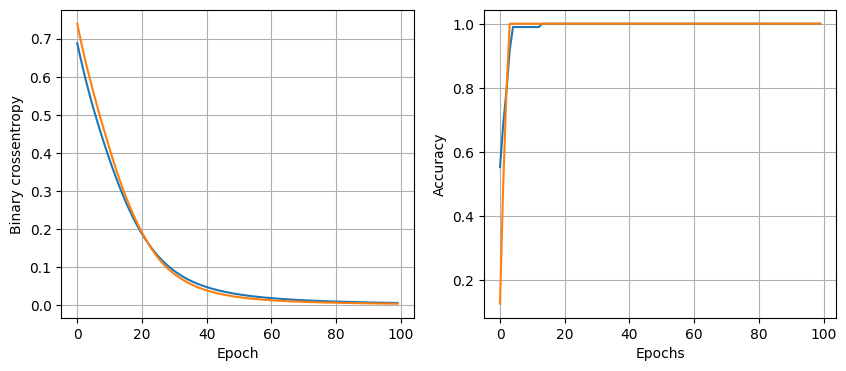

1/1 [==============================] - 0s 30ms/step - loss: 0.0102 - accuracy: 1.0000
16 nodes, dropout 0, lr0.001 , batch size 128 


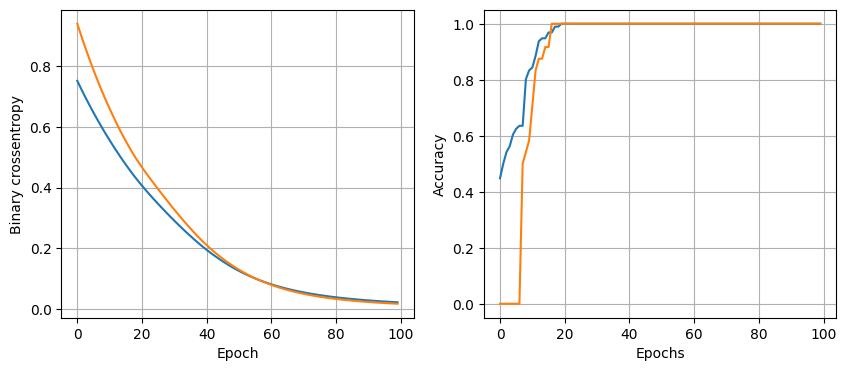

1/1 [==============================] - 0s 28ms/step - loss: 0.0271 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.01 , batch size 32 


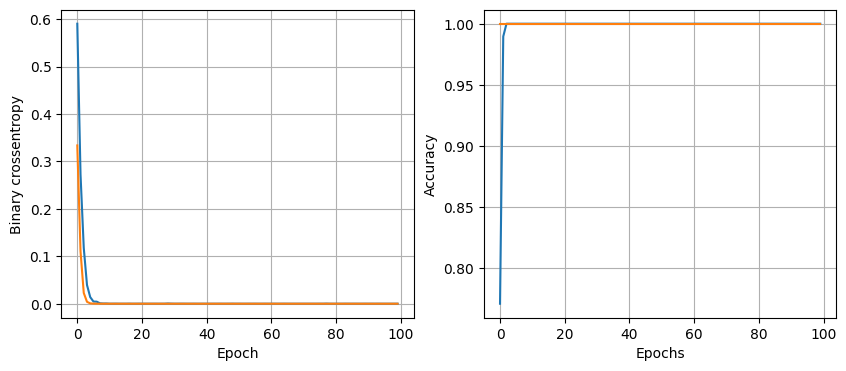

1/1 [==============================] - 0s 27ms/step - loss: 1.5103e-04 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.01 , batch size 64 


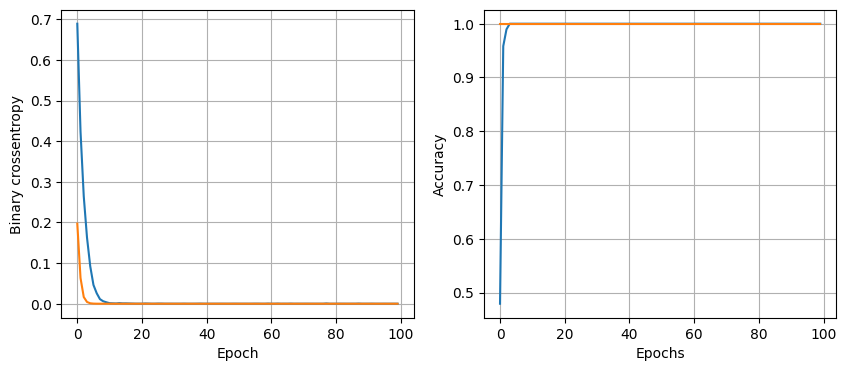

1/1 [==============================] - 0s 27ms/step - loss: 7.2292e-05 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.01 , batch size 128 


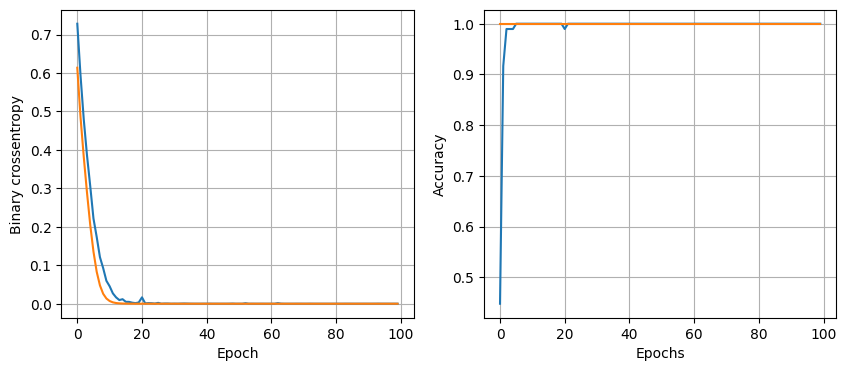

1/1 [==============================] - 0s 31ms/step - loss: 3.7365e-04 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.005 , batch size 32 


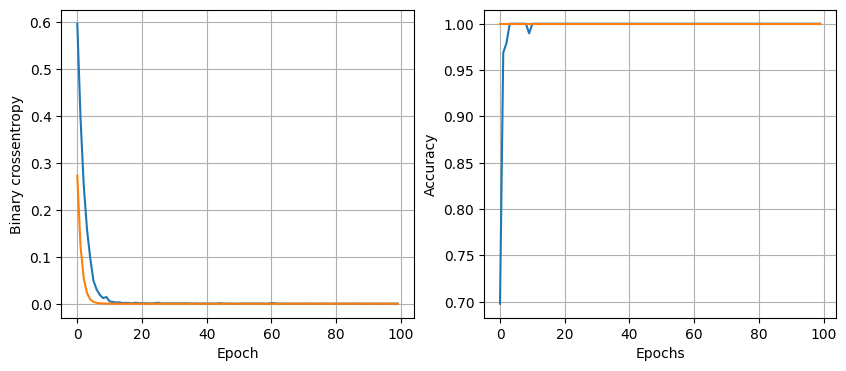

1/1 [==============================] - 0s 27ms/step - loss: 1.7074e-04 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.005 , batch size 64 


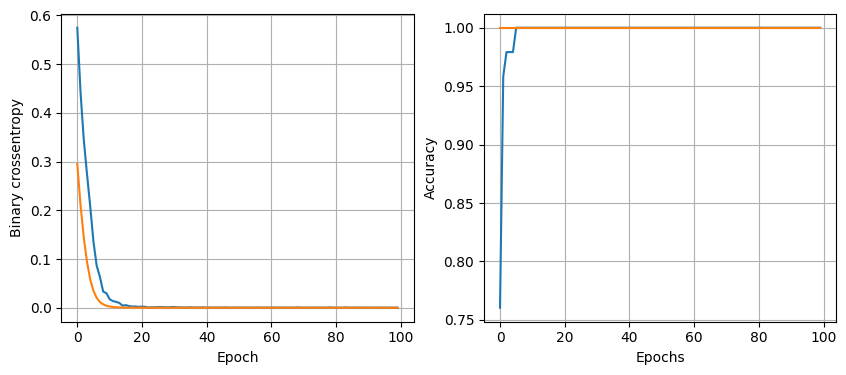

1/1 [==============================] - 0s 28ms/step - loss: 3.0457e-04 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.005 , batch size 128 


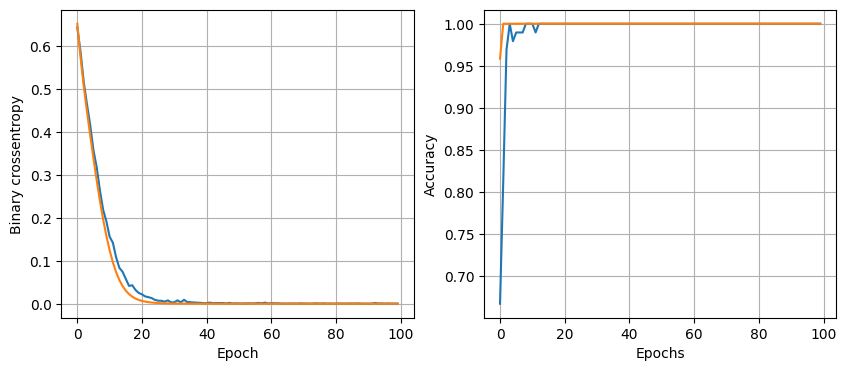

1/1 [==============================] - 0s 31ms/step - loss: 5.8352e-04 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.001 , batch size 32 


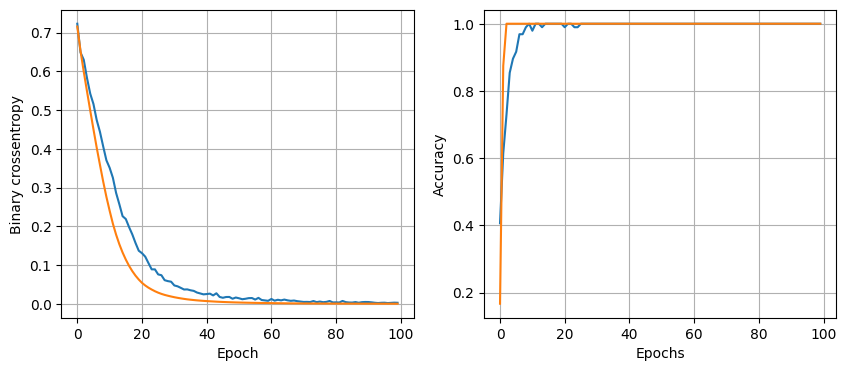

1/1 [==============================] - 0s 45ms/step - loss: 0.0041 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.001 , batch size 64 


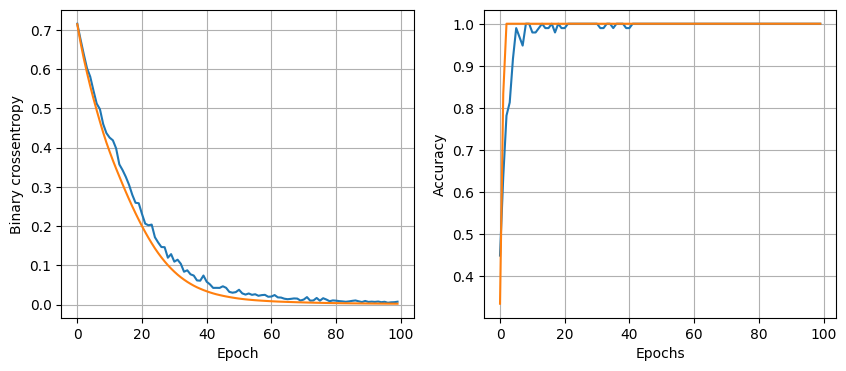

1/1 [==============================] - 0s 28ms/step - loss: 0.0064 - accuracy: 1.0000
16 nodes, dropout 0.2, lr0.001 , batch size 128 


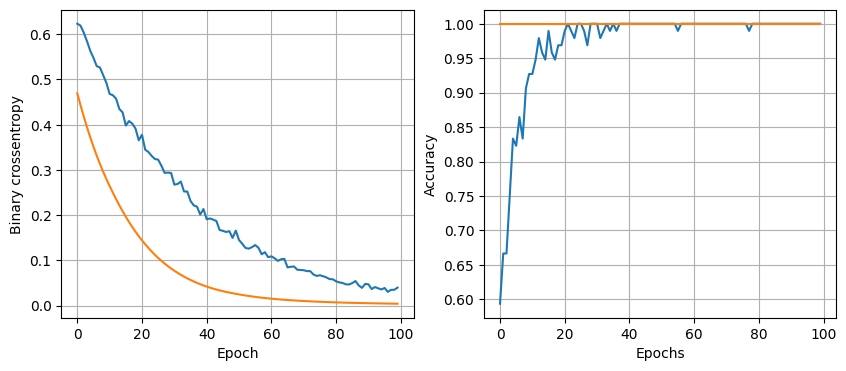

1/1 [==============================] - 0s 28ms/step - loss: 0.0318 - accuracy: 1.0000
32 nodes, dropout 0, lr0.01 , batch size 32 


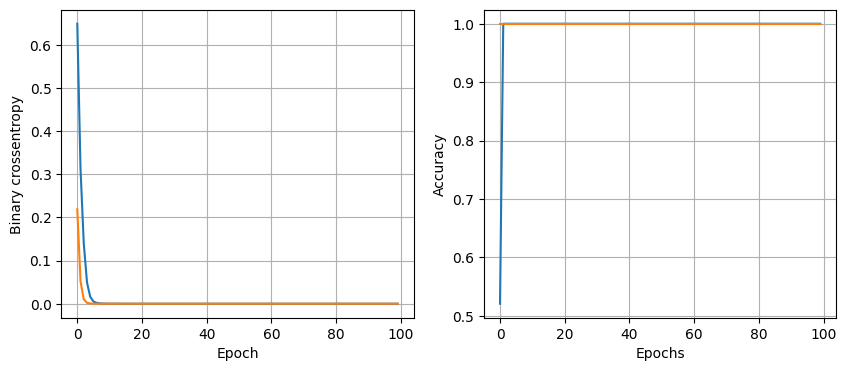

1/1 [==============================] - 0s 33ms/step - loss: 1.3724e-04 - accuracy: 1.0000
32 nodes, dropout 0, lr0.01 , batch size 64 


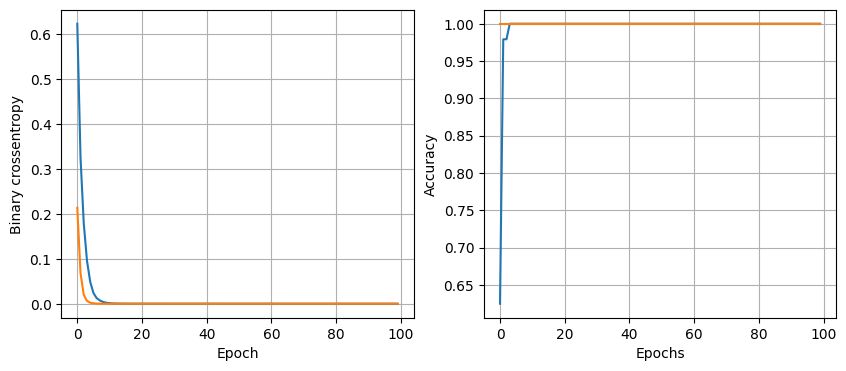

1/1 [==============================] - 0s 34ms/step - loss: 2.3021e-04 - accuracy: 1.0000
32 nodes, dropout 0, lr0.01 , batch size 128 


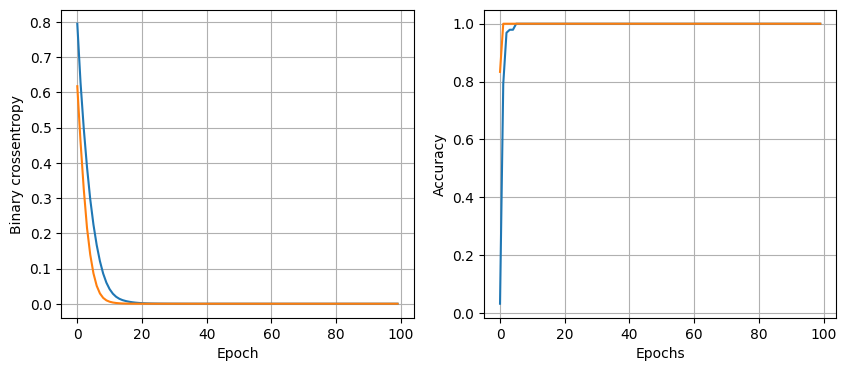

1/1 [==============================] - 0s 28ms/step - loss: 2.0782e-04 - accuracy: 1.0000
32 nodes, dropout 0, lr0.005 , batch size 32 


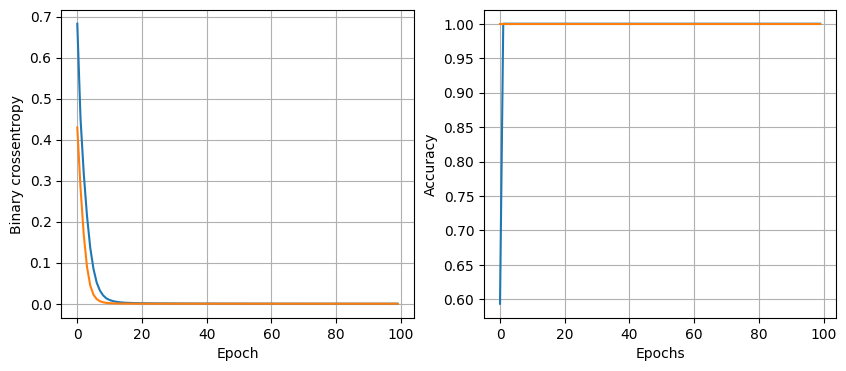

1/1 [==============================] - 0s 30ms/step - loss: 5.3759e-04 - accuracy: 1.0000
32 nodes, dropout 0, lr0.005 , batch size 64 


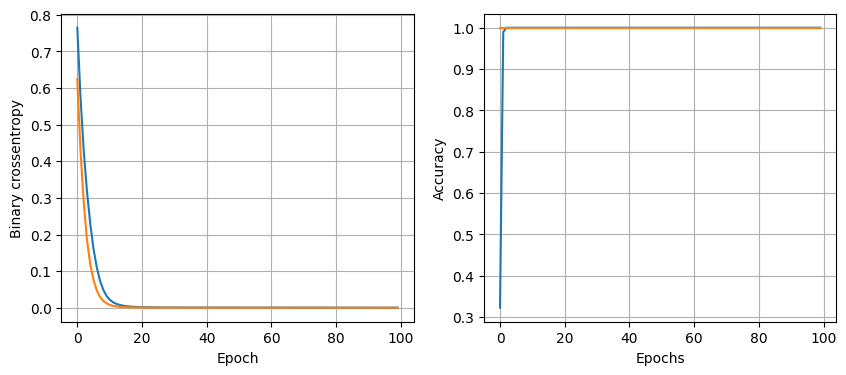

1/1 [==============================] - 0s 26ms/step - loss: 5.9776e-04 - accuracy: 1.0000
32 nodes, dropout 0, lr0.005 , batch size 128 


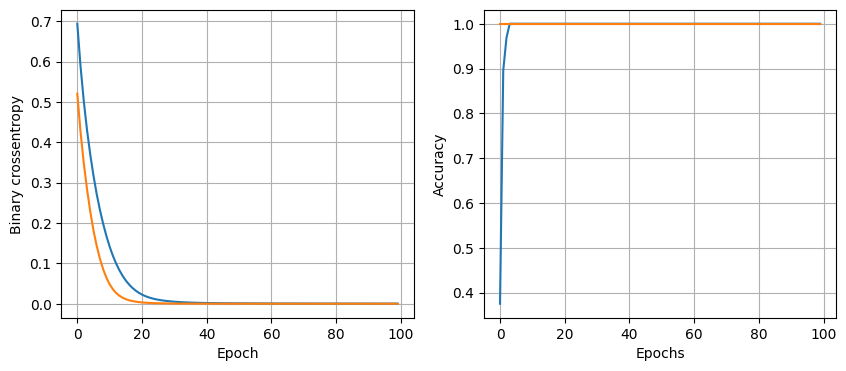

1/1 [==============================] - 0s 28ms/step - loss: 0.0011 - accuracy: 1.0000
32 nodes, dropout 0, lr0.001 , batch size 32 


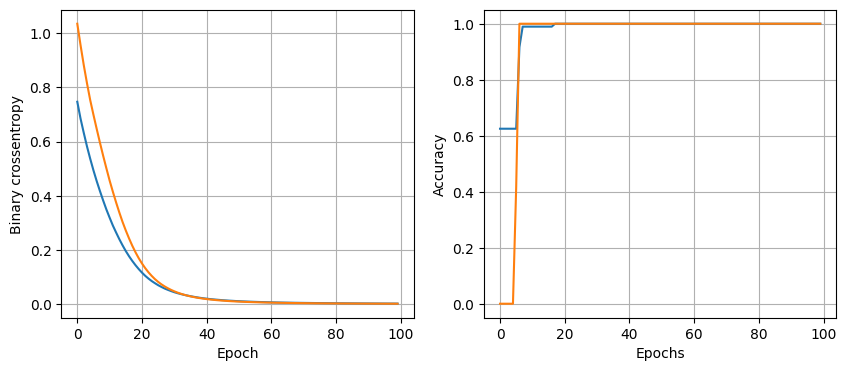

1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - accuracy: 1.0000
32 nodes, dropout 0, lr0.001 , batch size 64 


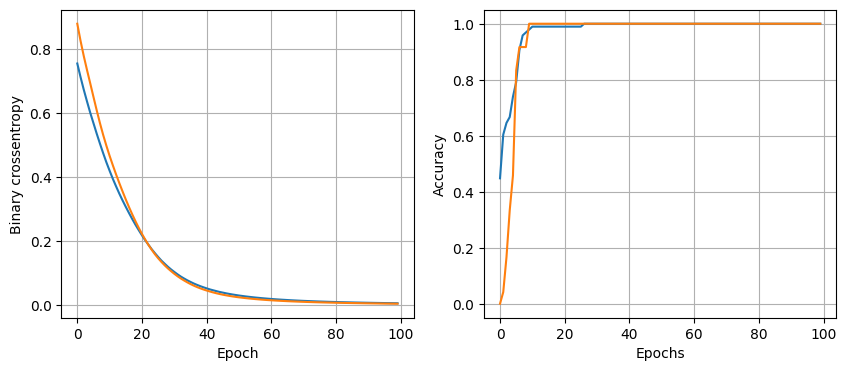

1/1 [==============================] - 0s 39ms/step - loss: 0.0106 - accuracy: 1.0000
32 nodes, dropout 0, lr0.001 , batch size 128 


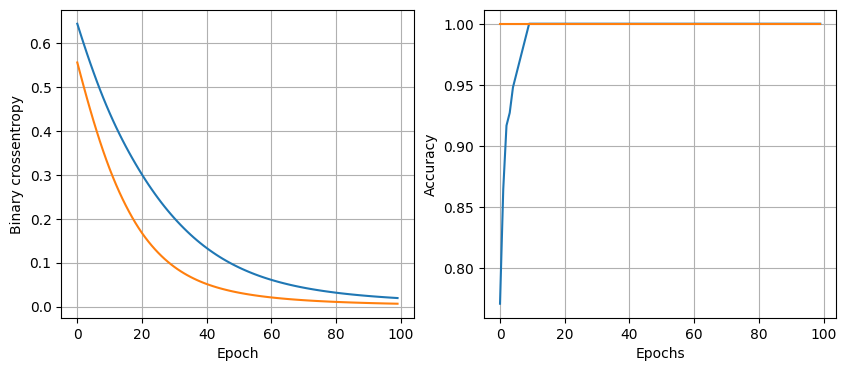

1/1 [==============================] - 0s 31ms/step - loss: 0.0248 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.01 , batch size 32 


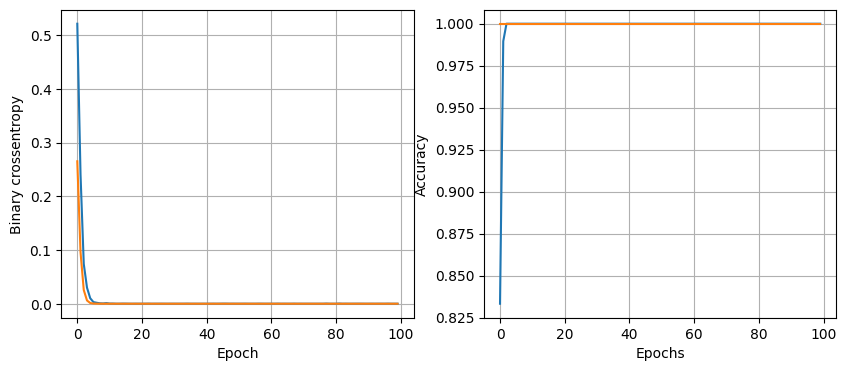

1/1 [==============================] - 0s 29ms/step - loss: 4.4029e-05 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.01 , batch size 64 


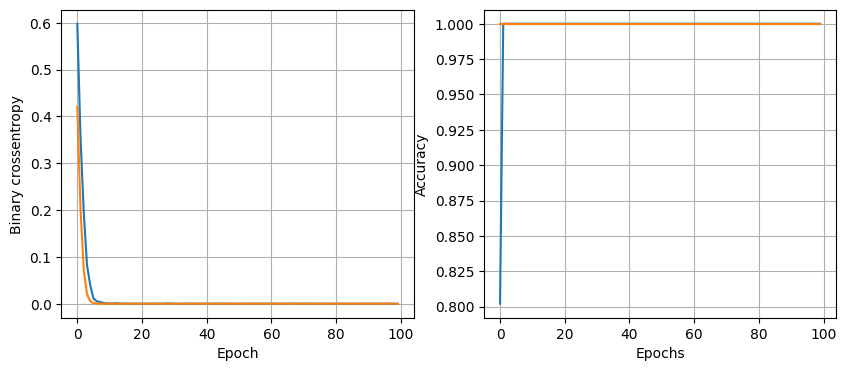

1/1 [==============================] - 0s 27ms/step - loss: 6.1347e-05 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.01 , batch size 128 


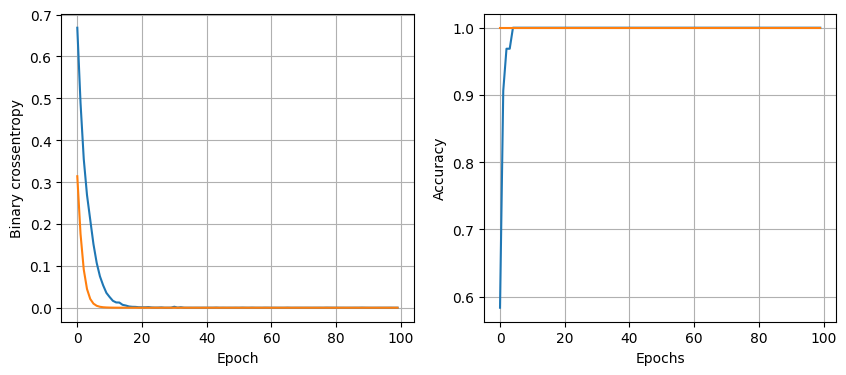

1/1 [==============================] - 0s 32ms/step - loss: 1.6297e-04 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.005 , batch size 32 


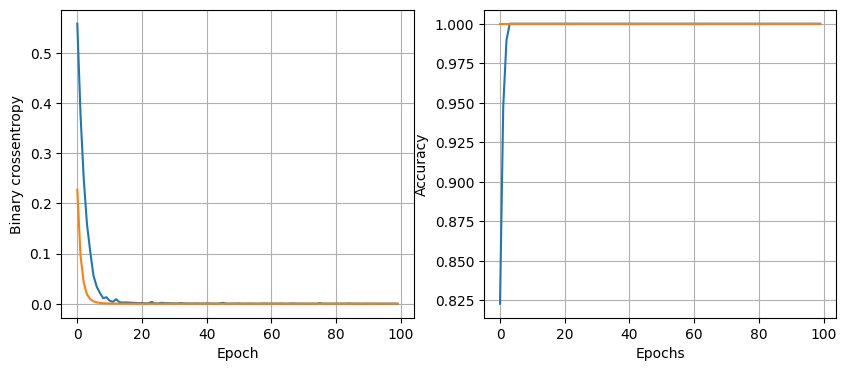

1/1 [==============================] - 0s 55ms/step - loss: 2.6909e-04 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.005 , batch size 64 


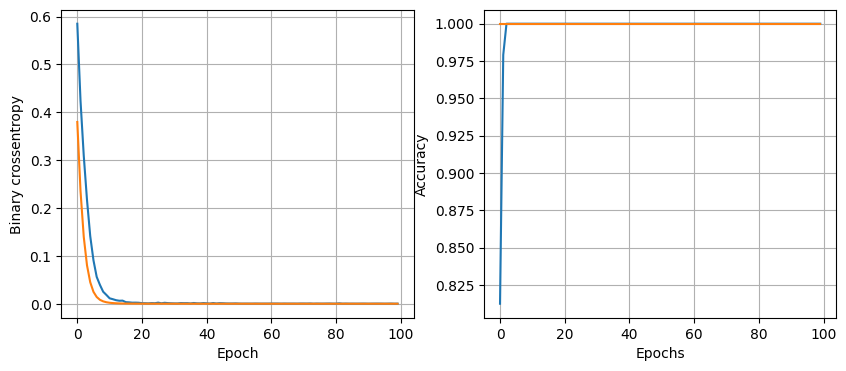

1/1 [==============================] - 0s 28ms/step - loss: 3.5893e-04 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.005 , batch size 128 


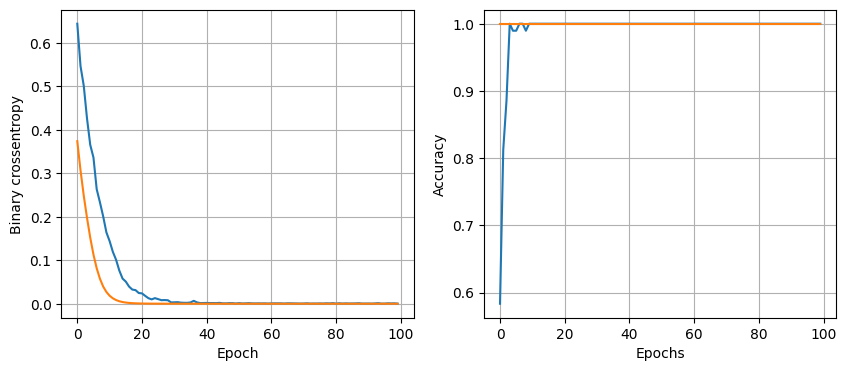

1/1 [==============================] - 0s 45ms/step - loss: 4.5406e-04 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.001 , batch size 32 


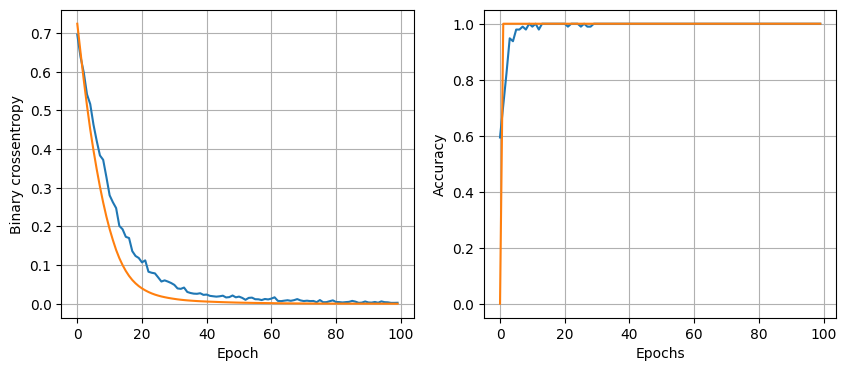

1/1 [==============================] - 0s 29ms/step - loss: 0.0045 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.001 , batch size 64 


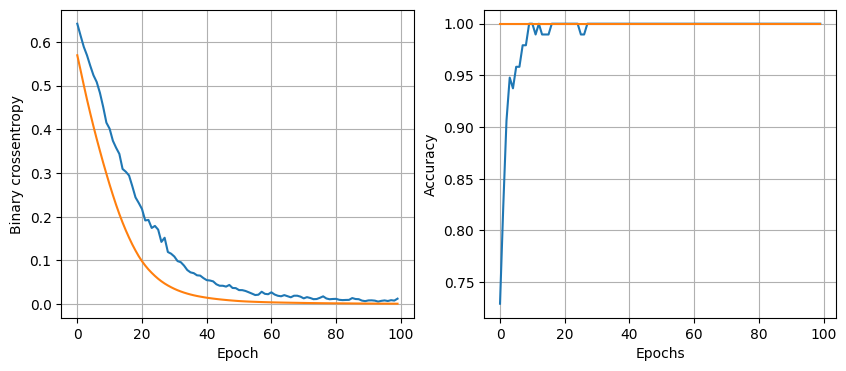

1/1 [==============================] - 0s 26ms/step - loss: 0.0083 - accuracy: 1.0000
32 nodes, dropout 0.2, lr0.001 , batch size 128 


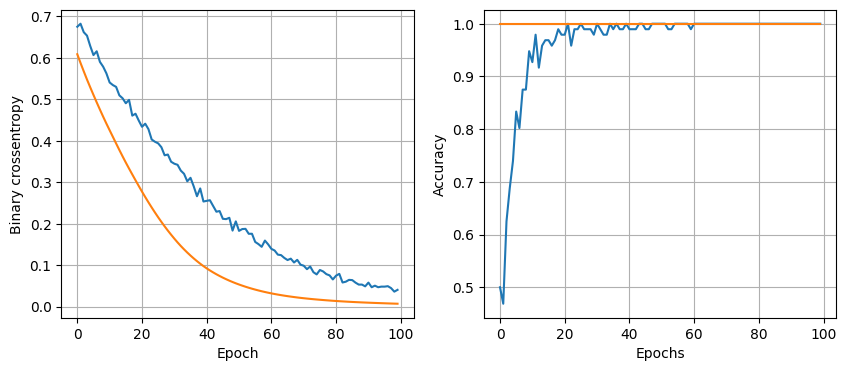

1/1 [==============================] - 0s 32ms/step - loss: 0.0441 - accuracy: 1.0000
64 nodes, dropout 0, lr0.01 , batch size 32 


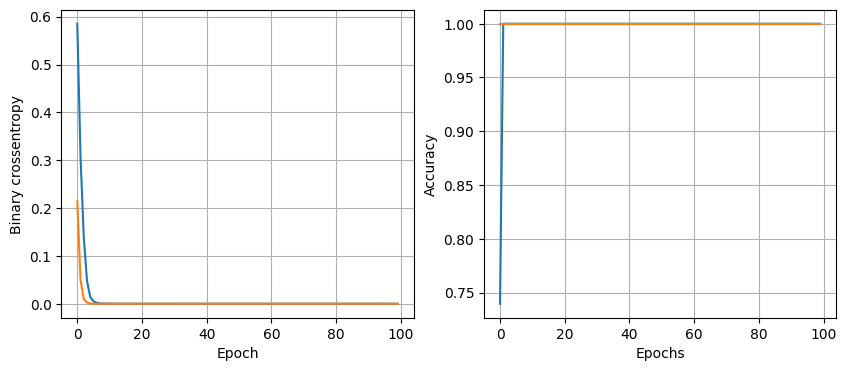

1/1 [==============================] - 0s 29ms/step - loss: 9.2043e-05 - accuracy: 1.0000
64 nodes, dropout 0, lr0.01 , batch size 64 


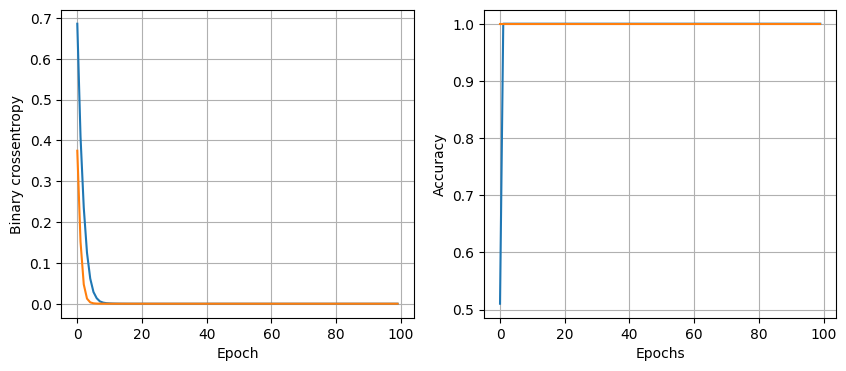

1/1 [==============================] - 0s 33ms/step - loss: 7.1942e-05 - accuracy: 1.0000
64 nodes, dropout 0, lr0.01 , batch size 128 


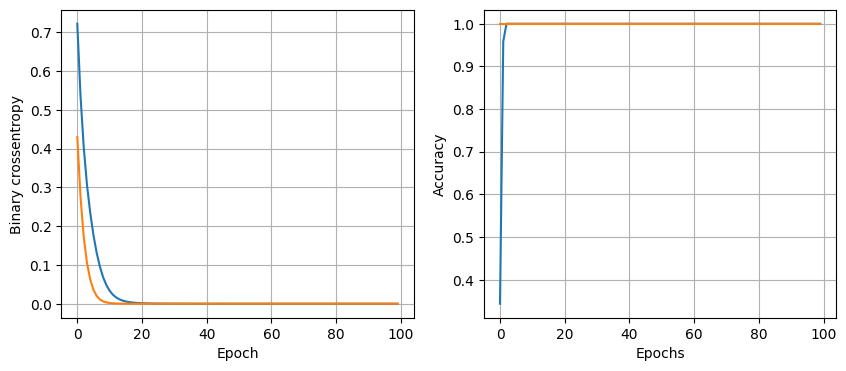

1/1 [==============================] - 0s 27ms/step - loss: 1.3769e-04 - accuracy: 1.0000
64 nodes, dropout 0, lr0.005 , batch size 32 


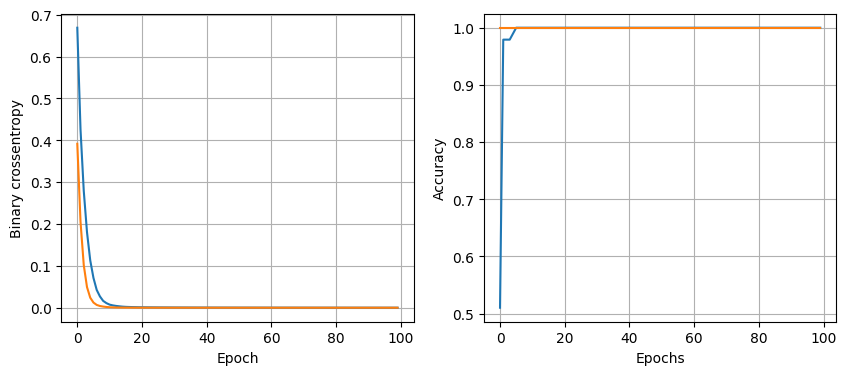

1/1 [==============================] - 0s 36ms/step - loss: 4.1588e-04 - accuracy: 1.0000
64 nodes, dropout 0, lr0.005 , batch size 64 


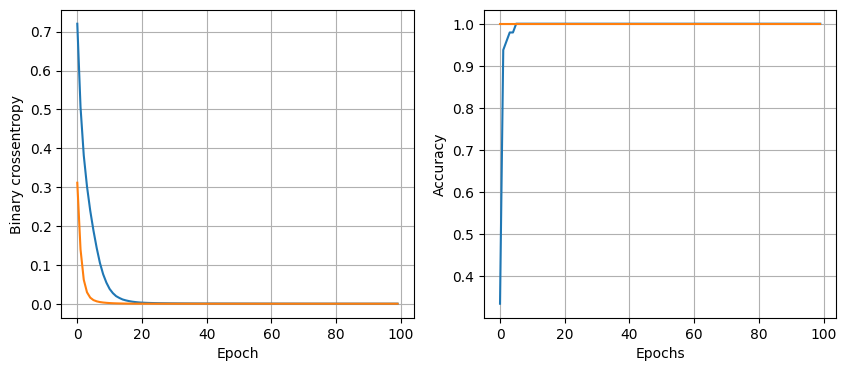

1/1 [==============================] - 0s 29ms/step - loss: 5.4785e-04 - accuracy: 1.0000
64 nodes, dropout 0, lr0.005 , batch size 128 


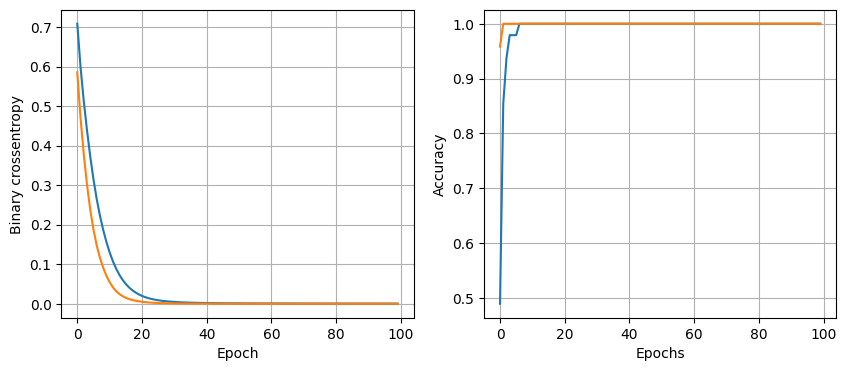

1/1 [==============================] - 0s 27ms/step - loss: 0.0014 - accuracy: 1.0000
64 nodes, dropout 0, lr0.001 , batch size 32 


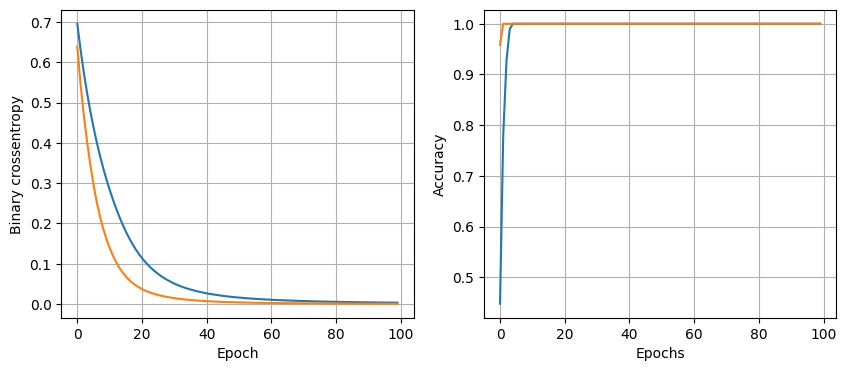

1/1 [==============================] - 0s 39ms/step - loss: 0.0062 - accuracy: 1.0000
64 nodes, dropout 0, lr0.001 , batch size 64 


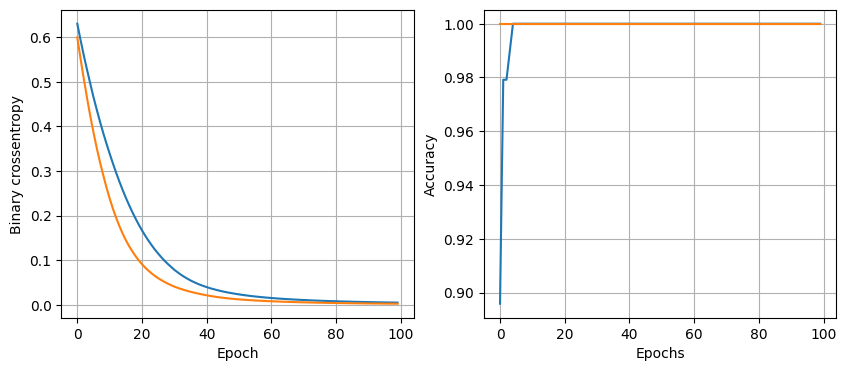

1/1 [==============================] - 0s 28ms/step - loss: 0.0098 - accuracy: 1.0000
64 nodes, dropout 0, lr0.001 , batch size 128 


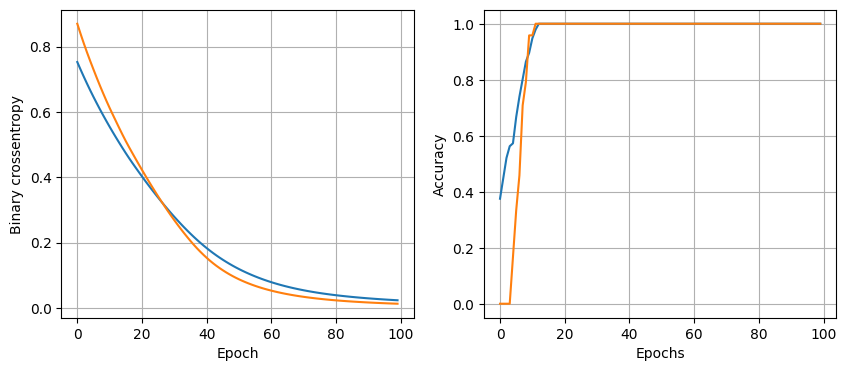

1/1 [==============================] - 0s 38ms/step - loss: 0.0320 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.01 , batch size 32 


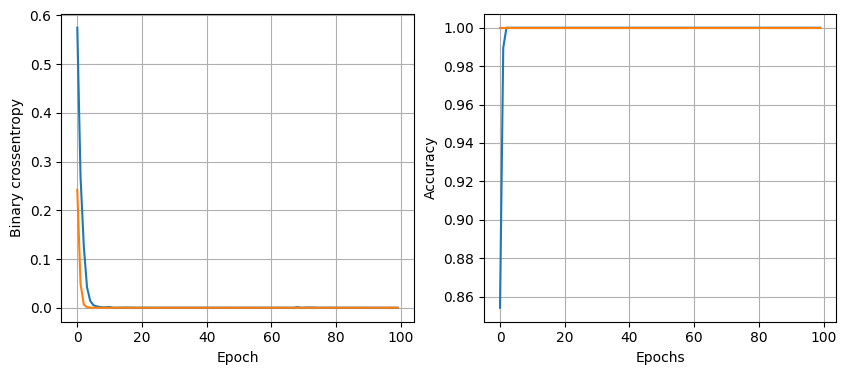

1/1 [==============================] - 0s 31ms/step - loss: 2.0768e-05 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.01 , batch size 64 


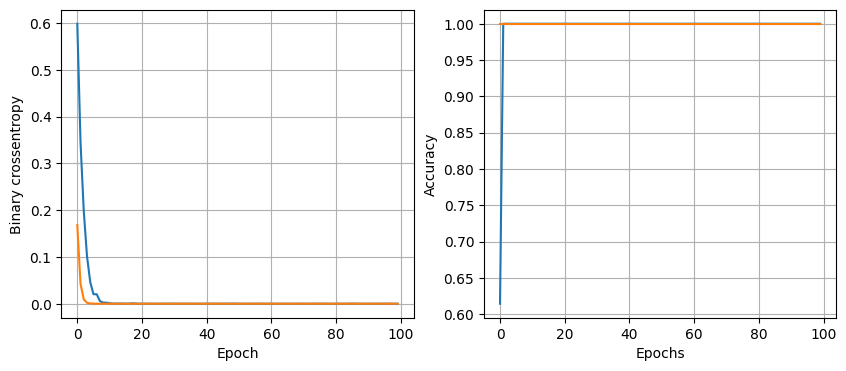

1/1 [==============================] - 0s 58ms/step - loss: 4.2229e-05 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.01 , batch size 128 


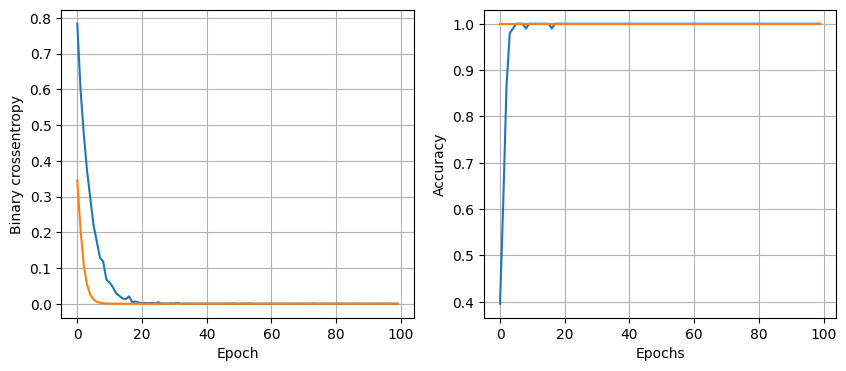

1/1 [==============================] - 0s 28ms/step - loss: 3.3209e-05 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.005 , batch size 32 


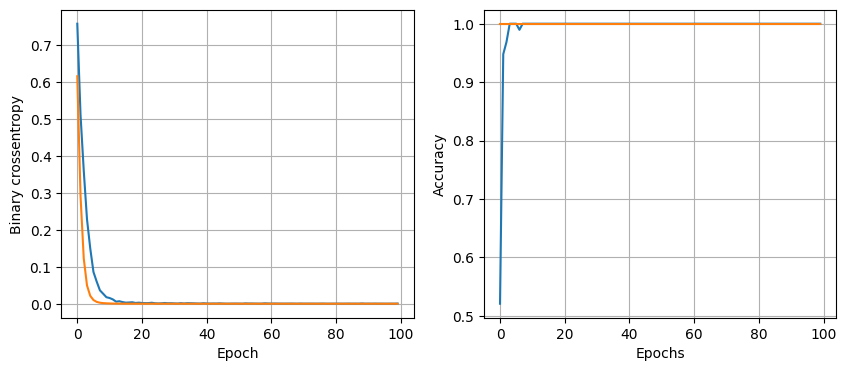

1/1 [==============================] - 0s 34ms/step - loss: 4.5597e-04 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.005 , batch size 64 


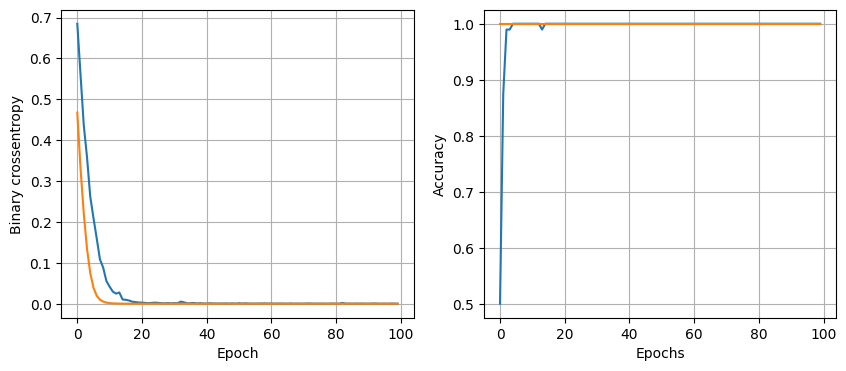

1/1 [==============================] - 0s 60ms/step - loss: 9.1661e-04 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.005 , batch size 128 


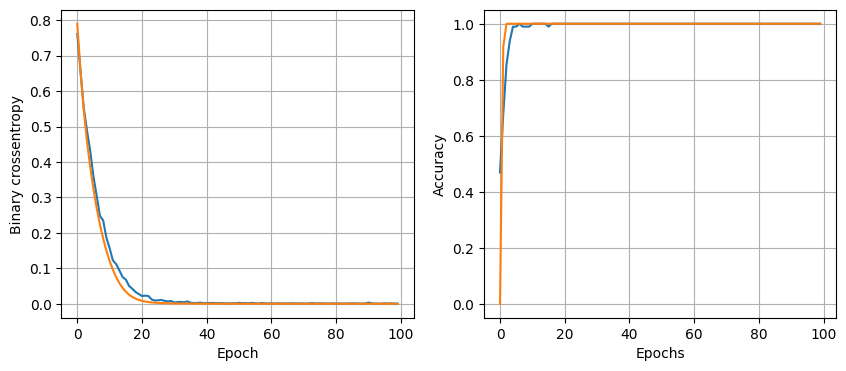

1/1 [==============================] - 0s 33ms/step - loss: 0.0015 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.001 , batch size 32 


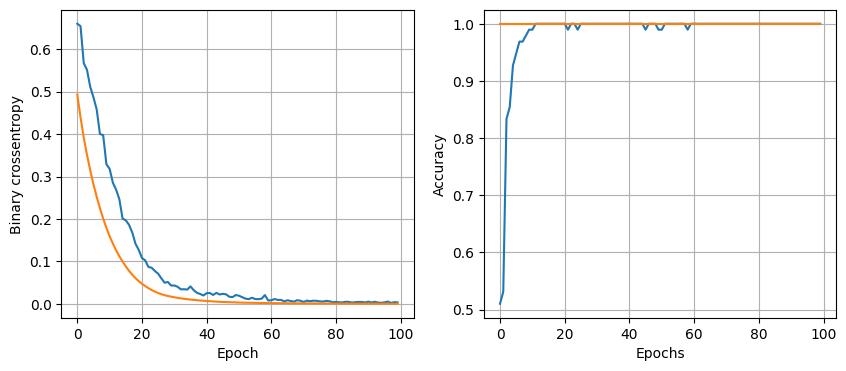

1/1 [==============================] - 0s 27ms/step - loss: 0.0036 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.001 , batch size 64 


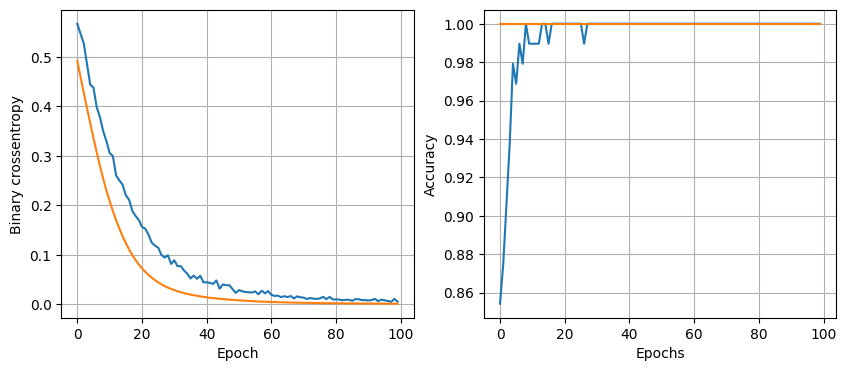

1/1 [==============================] - 0s 28ms/step - loss: 0.0084 - accuracy: 1.0000
64 nodes, dropout 0.2, lr0.001 , batch size 128 


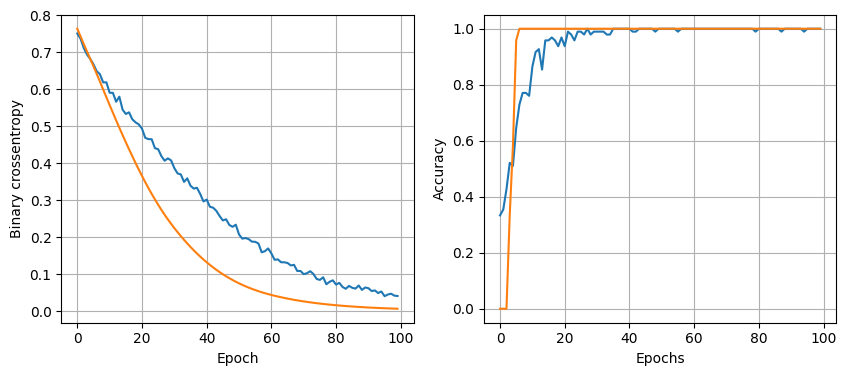

1/1 [==============================] - 0s 38ms/step - loss: 0.0436 - accuracy: 1.0000


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr{lr} , batch size {batch_size} ')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_lose_model = model

#Reflection


After all of this it is safe to say that these are the easiest approach to machine learning. Using such simple datasets we can actually utilize it to improve our understanding behind how the machines learn. Using this key concepts we actually dwell deep into this very topic. We will do so as time goes. For now, keep in mind that we didnt go through clustering. The reason for this is due to the data set used. It would be much clearer to use a dataset that is designed specifically for clustering. We will go through this later.